# **Codig Dojo**: Mortgages
## Creado por: Alejandro Acosta

- Fecha de creación: 2022-01-19
- Fecha de modificación: 2022-01-19
- Descripción: Mortgages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-ticks')

In [8]:
df = pd.read_csv('mortgages.csv')
filtro = df['Mortgage Name'] == '30 Year'
df = df[filtro]

In [9]:
df['cumulative interest'] = df.groupby('Interest Rate')['Interest Paid'].cumsum()


In [10]:
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,cumulative interest
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03,1000.00
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03,1998.28
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03,2994.84
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03,3989.67
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03,4982.77


In [11]:
df2 = df.pivot_table(index='Month', columns='Interest Rate', values = 'cumulative interest', aggfunc=np.sum)

Text(0, 0.5, 'Cumulative Interest')

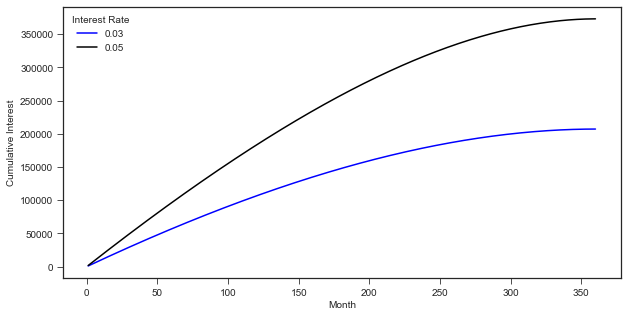

In [15]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))
colors = ['blue', 'black']
sns.lineplot(x='Month',y='cumulative interest', hue='Interest Rate', data=df, palette=colors)
plt.ylabel('Cumulative Interest')

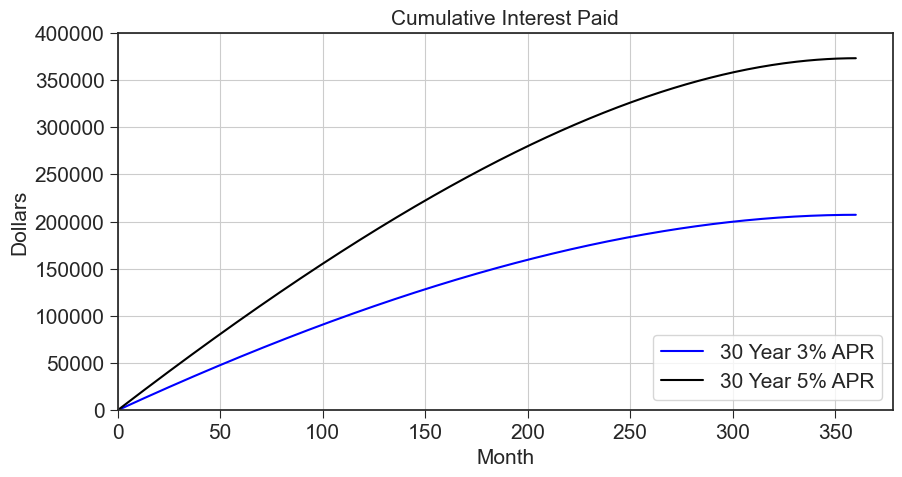

In [61]:
sns.set_style('ticks')
plt.figure(figsize=(10, 5), dpi=100)
colors = ['blue', 'black']


sns.lineplot(x='Month', y='cumulative interest',
             hue='Interest Rate', data=df, palette=colors)

plt.grid()

plt.title('Cumulative Interest Paid', fontsize=15)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Dollars', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(range(0, 450000, 50000), fontsize=15)

plt.xlim(0)
plt.ylim(0)

plt.legend(['30 Year 3% APR', '30 Year 5% APR'],
           loc="lower right", frameon=True, fontsize=15)

plt.show()